# Stochastic Rounding Demonstration

Stochastic rounding benefits from good speed but is also unbiased.

In [1]:
from dependent_rounding import round_matrix
import numpy as np
import matplotlib.pyplot as plt

m=1000
n=1000
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

start = np.abs(np.random.normal(0,0.5,(m,n)))
print(start)

[[0.009 0.514 0.233 ... 0.161 0.305 0.39 ]
 [0.943 0.504 0.357 ... 0.69  1.025 0.125]
 [1.21  0.044 0.137 ... 0.097 0.108 0.385]
 ...
 [0.257 0.225 1.256 ... 0.315 0.4   0.386]
 [0.18  0.898 0.226 ... 0.766 0.8   0.102]
 [0.094 0.335 0.103 ... 1.071 0.061 0.135]]


### Timing Comparison

In [2]:
python_result = round_matrix(np.copy(start), 'stochastic', 0, 'python', track_time=True)

Total time (ms): 16.54839515686035


In [3]:
cpp_result = round_matrix(np.copy(start), 'stochastic', 0, 'cpp', track_time=True)

Total time (ms): 10.751008987426758


### Bias

Stochastic rounding is unbiased as seen below. Lack of proper randomness can be an issue, which can be seen in the probable odd shape of the results.

0.24153911486734897


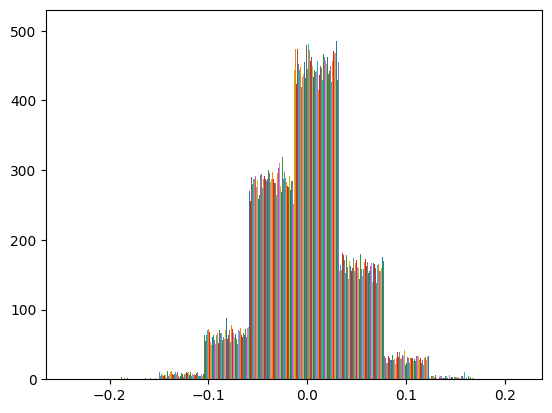

In [18]:
results = np.zeros_like(cpp_result)
for i in range(100):
    results += round_matrix(np.copy(start), 'stochastic', 0, 'cpp', seed = 1009*i)

print(np.max(np.abs(results / 100.0 - start)))
plt.hist((results / 100.0 - start), rwidth=1.0)
plt.show()